Le neurone intégrateur à fuite

1. Le modèle

Le modèle de l'intégrateur à fuite décrit le potentiel de membrane d'un neurone en fonction de son entrée sous forme de courant injecté, 

question 1.1

In [1]:
E_L = -70e-3
V_thresh = -55e-3
R_m = 10e6

I_min = (V_thresh - E_L) / R_m
print(I_min * 1e9,"nA")


1.5000000000000007 nA


question 1.2

In [2]:
import numpy as np

E_L = -70e-3
V_thresh = -55e-3
R_m = 10e6
tau_m = 10e-3
I = 2e-9

t_seuil = -tau_m * np.log(1 - (V_thresh - E_L) / (R_m * I))
print(t_seuil)


0.013862943611198919


question 1.3 

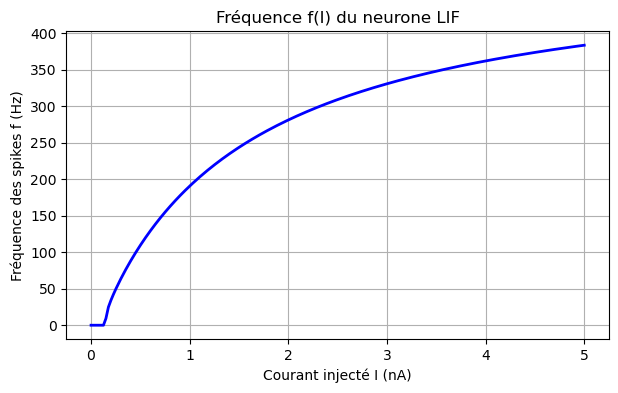

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Paramètres du modèle ---
E_L = -70e-3       # Potentiel de repos (V)
V_th = -55e-3       # Potentiel seuil (V)
R = 100e6           # Résistance de membrane (Ohms)
tau_m = 20e-3       # Constante de temps (s)
t_ref = 2e-3        # Temps réfractaire (s)

# --- Courants injectés ---
I = np.linspace(0, 5e-9, 200)   # de 0 à 5 nA
I_min = (V_th - E_L) / R        # courant minimal (A)

# --- Calcul de la fréquence f(I) ---
f = np.zeros_like(I)

for idx, I_inj in enumerate(I):
    if I_inj > I_min:
        T = t_ref - tau_m * np.log(1 - (V_th - E_L) / (R * I_inj))
        f[idx] = 1 / T
    else:
        f[idx] = 0  # Pas de spike si I < I_min

# --- Tracé ---
plt.figure(figsize=(7, 4))
plt.plot(I*1e9, f, 'b', linewidth=2)
plt.xlabel("Courant injecté I (nA)")
plt.ylabel("Fréquence des spikes f (Hz)")
plt.title("Fréquence f(I) du neurone LIF")
plt.grid(True)
plt.show()


2. Exemple détaillé :

2.1 Simulation (intégration d’Euler)

In [4]:
# Importer les bibliothèques essentielles
import numpy as np
import matplotlib.pyplot as plt

# Définir les paramètres de simulation
Vthresh = -55   # mV
Vreset  = -75   # mV
Vspike  =  20   # mV
Rm      =  10   # MOhms
tau     =  10   # ms
dt      =  0.05 # ms
counter =  0
Vrest=-70
### Étape 2 : Configurer les structures de données pour nos données

# Crée un vecteur de points de temps de 0 à 499 ms avec un pas de dt=0.05
timeVector = np.arange(0, 500, dt)
voltageVector = np.zeros(len(timeVector))

# Crée un espace réservé pour le vecteur de stimulation externe.
stimVector = np.zeros(len(timeVector))

### Étape 3 : Définir nos conditions initiales
voltageVector[0] = Vrest

### Étape 4 : Configurer les impulsions de courant appliquées par Johnny en fonction du temps (rappeler que dt=0.05, donc il y a 20 points de temps par milliseconde)
# Définir la stimulation externe à 0.5 nA pour les 100 premières ms
stimVector[0:2000] = 0.5
# Définir la stimulation externe à 1.3 nA entre 125 et 250 ms
stimVector[2500:4000] = 1.3
# Définir la stimulation externe à 2.0 nA entre 250 et 350 ms
stimVector[5000:7000] = 2.0

### Étape 5 : Utiliser une boucle for pour utiliser la valeur de tension actuelle pour calculer la valeur de tension suivante

for t in range(len(timeVector)-1):
  Vinf= Vrest + Rm * stimVector[t]
  voltageVector[t+1] = Vinf + (voltageVector[t]-Vinf)*np.exp(-dt/tau)
  if voltageVector[t+1] >= Vthresh:
     voltageVector[t+1] = Vspike
     # Cette instruction 'if' vérifie si nous sommes déjà à Vspike (c'est une autre façon dont nous pouvons être au-dessus de Vthresh)
     if voltageVector[t] == Vspike:
        # Définir la tension suivante égale à la valeur de réinitialisation
        voltageVector[t+1] = Vreset
        # Cela comptera le nombre de spikes observés afin que le taux de spikes puisse être calculé plus tard
        counter += 1



Text(0.5, 1.0, 'Tension en fonction du temps')

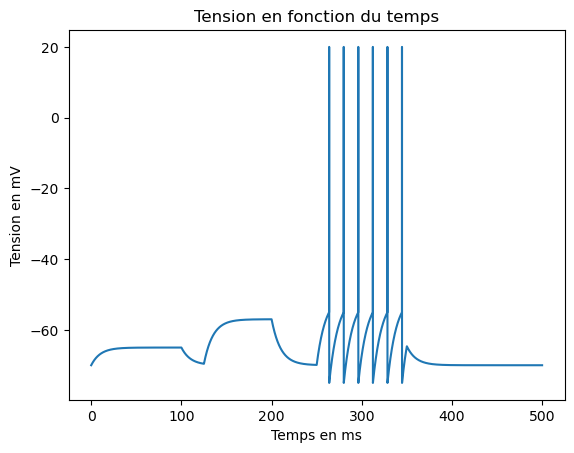

In [5]:
# Définir le nouvel objet de graphique
plt.figure()
# Tracer la tension (axe y) en fonction du temps (axe x)
plt.plot(timeVector, voltageVector)
# Étiqueter l'axe y
plt.ylabel('Tension en mV')
# Étiqueter l'axe x
plt.xlabel('Temps en ms')
# Définir le titre
plt.title('Tension en fonction du temps')

question 2.1 Approche intuitive

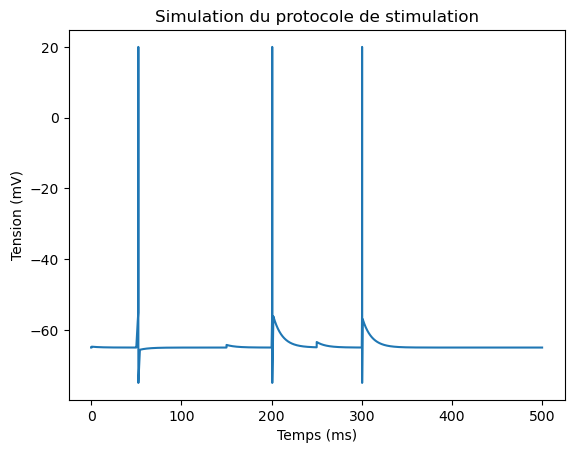

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Vrest = -65
Vthresh = -55
Vreset = -75
Vspike = 20
Rm = 10
tau = 10
dt = 0.05
counter = 0

timeVector = np.arange(0, 500, dt)
voltageVector = np.zeros(len(timeVector))
stimVector = np.zeros(len(timeVector))
voltageVector[0] = Vrest

stimVector[int(0.5/dt)] = 5
stimVector[int(50/dt):int(54/dt)] = 5
stimVector[int(150/dt)] = 15
stimVector[int(200/dt):int(202/dt)] = 15
stimVector[int(250/dt)] = 30
stimVector[int(300/dt):int(301/dt)] = 30

for t in range(len(timeVector)-1):
    Vinf = Vrest + Rm * stimVector[t]
    voltageVector[t+1] = Vinf + (voltageVector[t] - Vinf) * np.exp(-dt / tau)
    if voltageVector[t+1] >= Vthresh:
        voltageVector[t+1] = Vspike
        if voltageVector[t] == Vspike:
            voltageVector[t+1] = Vreset
            counter += 1

plt.plot(timeVector, voltageVector)
plt.xlabel("Temps (ms)")
plt.ylabel("Tension (mV)")
plt.title("Simulation du protocole de stimulation")
plt.show()


Conclution :


Les courants courts et faibles ne déclenchent pas de spike.
Les courants forts mais très brefs sont aussi insuffisants.
Un spike nécessite un courant assez fort ou maintenu suffisamment longtemps.

question 2.2

C:\Users\sanar\AppData\Local\Temp\ipykernel_880\34576392.py:12: RuntimeWarning: invalid value encountered in log
  t_required = -tau * np.log(1 - (Vthresh - Vrest) / (Rm * I_values))


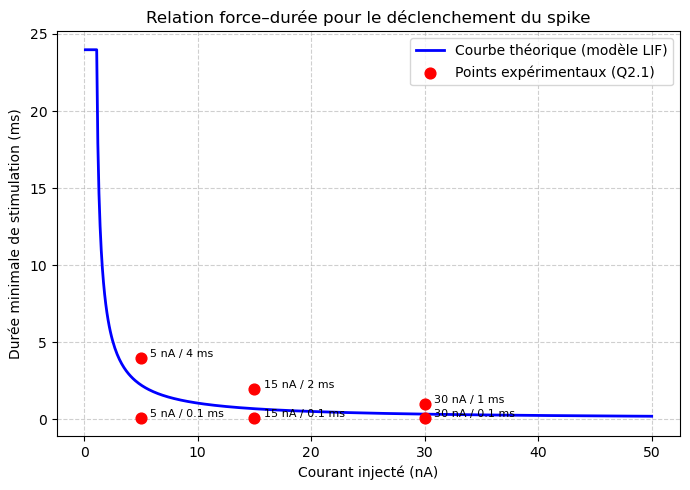

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes du modèle
Vrest = -65e-3   # Potentiel de repos (V)
Vthresh = -55e-3 # Seuil de déclenchement (V)
Rm = 10e6        # Résistance membranaire (ohms)
tau = 10e-3      # Constante de temps membranaire (s)

# ---- Courbe théorique ----
I_values = np.linspace(0.1e-9, 50e-9, 500)  # 0.1 à 50 nA
t_required = -tau * np.log(1 - (Vthresh - Vrest) / (Rm * I_values))
t_required[np.isnan(t_required)] = np.nanmax(t_required[np.isfinite(t_required)])  # éviter NaN

# ---- Points expérimentaux issus du protocole 2.1 ----
# (amplitude en nA, durée en ms)
measured_points = {
    "5 nA / 0.1 ms": (5, 0.1),
    "5 nA / 4 ms": (5, 4),
    "15 nA / 0.1 ms": (15, 0.1),
    "15 nA / 2 ms": (15, 2),
    "30 nA / 0.1 ms": (30, 0.1),
    "30 nA / 1 ms": (30, 1)
}

# Séparation des points
currents_nA = np.array([v[0] for v in measured_points.values()])
durations_ms = np.array([v[1] for v in measured_points.values()])

# ---- Tracé ----
plt.figure(figsize=(7, 5))
plt.plot(I_values * 1e9, t_required * 1e3, label="Courbe théorique (modèle LIF)", color='blue', lw=2)
plt.scatter(currents_nA, durations_ms, color='red', s=60, zorder=3, label="Points expérimentaux (Q2.1)")

# Étiquettes pour chaque point expérimental
for label, (I, t) in measured_points.items():
    plt.text(I + 0.8, t + 0.05, label, fontsize=8)

# ---- Mise en forme ----
plt.xlabel("Courant injecté (nA)")
plt.ylabel("Durée minimale de stimulation (ms)")
plt.title("Relation force–durée pour le déclenchement du spike")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


3. Courant de bruit blanc gaussien 

3.1 Explorer de neurones LIF pour entrée bruyante


In [8]:
def my_GWN(pars, mu, sig, myseed=False):
  """
  Function that generates Gaussian white noise input

  Args:
    pars       : parameter dictionary
    mu         : noise baseline (mean)
    sig        : noise amplitute (standard deviation)
    myseed     : random seed. int or boolean
                 the same seed will give the same
                 random number sequence

  Returns:
    I          : Gaussian white noise input
  """

  # Retrieve simulation parameters
  dt, range_t = pars['dt'], pars['range_t']
  Lt = range_t.size

  # Set random seed
  if myseed:
      np.random.seed(seed=myseed)
  else:
      np.random.seed()

  # Generate GWN
  # we divide here by 1000 to convert units to sec.
  I_gwn = mu + sig * np.random.randn(Lt) / np.sqrt(dt / 1000.)

  return I_gwn

Question 3.1 :Avec un courant DC pur, le neurone déclenche des spikes de manière régulière. Lorsque l’on ajoute du bruit blanc gaussien (σ > 0), les spikes deviennent irréguliers et leur fréquence varie dans le temps. En augmentant la moyenne μ, le neurone déclenche plus souvent, tandis que l’augmentation de σ rend le déclenchement plus variable. Ainsi, μ influence le nombre de spikes et σ leur irrégularité.

3.2 Taux de déclenchement et irrégularité des temps de spike

In [9]:
import numpy as np

def compute_spike_times(timeVector, stimVector, V_rest=-65, V_th=-50, V_reset=-65, tau_m=20, R_m=10):
    """
    Simule un neurone LIF et retourne les instants de spikes.

    Args:
        timeVector : numpy array du temps (ms)
        stimVector : numpy array du courant injecté (nA)
        V_rest     : potentiel de repos (mV)
        V_th       : seuil (mV)
        V_reset    : potentiel après spike (mV)
        tau_m      : constante de temps membranaire (ms)
        R_m        : résistance membranaire (MΩ)

    Returns:
        spike_times : liste des instants (ms) où un spike est déclenché
    """
    dt = timeVector[1] - timeVector[0]
    V = np.ones(len(timeVector)) * V_rest
    spike_times = []

    for t in range(1, len(timeVector)):
        dV = (-(V[t-1] - V_rest) + R_m * stimVector[t-1]) / tau_m * dt
        V[t] = V[t-1] + dV
        if V[t] >= V_th:
            V[t] = V_reset
            spike_times.append(timeVector[t])

    return spike_times



Explorer F-I pour différents sig_gwn

histogrammes

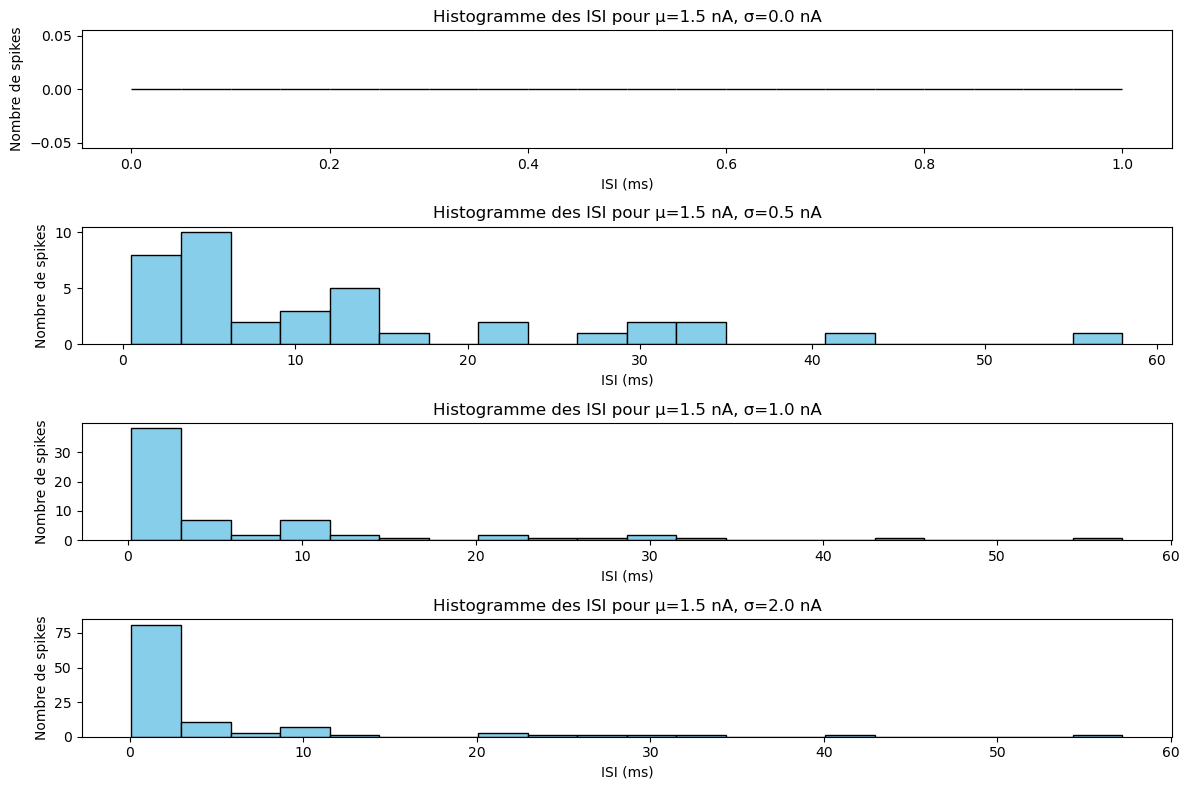

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du neurone
pars = {
    'V_rest': -65,
    'V_th': -50,
    'V_reset': -65,
    'tau_m': 20,
    'R_m': 10,
    'dt': 0.1,
    'range_t': np.arange(0, 500, 0.1)
}

def my_GWN(pars, mu, sig, myseed=False):
    dt, range_t = pars['dt'], pars['range_t']
    Lt = range_t.size
    if myseed:
        np.random.seed(seed=myseed)
    I_gwn = mu + sig * np.random.randn(Lt) / np.sqrt(dt / 1000.)
    return I_gwn

def compute_spike_times(timeVector, stimVector, V_rest=-65, V_th=-50, V_reset=-65, tau_m=20, R_m=10):
    dt = timeVector[1] - timeVector[0]
    V = np.ones(len(timeVector)) * V_rest
    spike_times = []
    for t in range(1, len(timeVector)):
        dV = (-(V[t-1] - V_rest) + R_m * stimVector[t-1]) / tau_m * dt
        V[t] = V[t-1] + dV
        if V[t] >= V_th:
            V[t] = V_reset
            spike_times.append(timeVector[t])
    return spike_times

# Exploration de différents σ
mu = 1.5
sigma_values = [0.0, 0.5, 1.0, 2.0]

plt.figure(figsize=(12, 8))

for i, sigma in enumerate(sigma_values):
    I = my_GWN(pars, mu, sigma, myseed=2020)
    spike_times = compute_spike_times(pars['range_t'], I)
    
    # Calcul des intervalles inter-spikes (ISI)
    ISI = np.diff(spike_times)
    
    plt.subplot(len(sigma_values), 1, i+1)
    plt.hist(ISI, bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogramme des ISI pour μ={mu} nA, σ={sigma} nA")
    plt.xlabel("ISI (ms)")
    plt.ylabel("Nombre de spikes")
    plt.tight_layout()

plt.show()


Question 3.3

In [11]:
import numpy as np

def isi_cv_LIF(spike_times):
    """
    Calculates the interspike intervals (ISI) and
    the coefficient of variation (CV) for a given spike_train

    Args:
        spike_times : (n, ) vector with the spike times (ndarray or list)

    Returns:
        isi : (n-1,) vector with the inter-spike intervals (ms)
        cv  : coefficient of variation of isi (float)
    """
    spike_times = np.array(spike_times)  # au cas où c'est une liste
    
    if len(spike_times) >= 2:
        # Calcul des intervalles inter-spikes
        isi = np.diff(spike_times)
        # Coefficient de variation : std / mean
        cv = np.std(isi) / np.mean(isi)
    else:
        isi = np.nan
        cv = np.nan

    return isi, cv


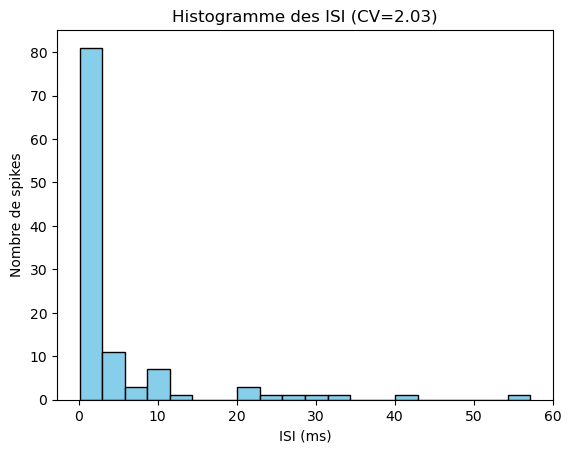

In [12]:
import matplotlib.pyplot as plt
# Calcul des ISI et du CV
isi, cv = isi_cv_LIF(spike_times)
plt.hist(isi, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("ISI (ms)")
plt.ylabel("Nombre de spikes")
plt.title(f"Histogramme des ISI (CV={cv:.2f})")
plt.show()


Dans l'illustration ci-dessus, nous voyons que le CV de la distribution de l'intervalle inter-spike (ISI) dépend de σ du GWN. Qu'en est-il de la moyenne du GWN, cela devrait-il également affecter le CV ?

Oui. La moyenne μ influence surtout le **taux moyen de spikes**, tandis que l’écart-type σ contrôle l’**irrégularité**. Une μ plus grande peut légèrement réduire le CV si le bruit est faible, mais σ reste le facteur principal qui augmente le CV.


Si oui, comment ? L'efficacité de σ dans l'augmentation du CV dépend-elle de μ ?

Oui, l’effet de σ sur le CV dépend de μ.

Pour une μ faible (courant moyen proche du seuil ou en dessous), même un petit σ peut provoquer des déclenchements irréguliers, donc le CV augmente rapidement.

Pour une μ élevée (courant moyen bien au-dessus du seuil), le neurone déclenche souvent de manière quasi régulière, donc le même σ produit moins d’irrégularité relative et le CV augmente moins.

Question 3.4

Effet de σ sur la courbe F-I :

L’augmentation de σ rend la courbe F-I plus lisse et stochastique. Même pour de faibles μ, le bruit peut provoquer des spikes, augmentant légèrement le taux moyen.

Pourquoi μ réduit le CV :

Une moyenne μ plus élevée entraîne des déclenchements plus fréquents et réguliers. Même si le bruit est présent, les spikes sont plus proches les uns des autres, ce qui diminue le CV.

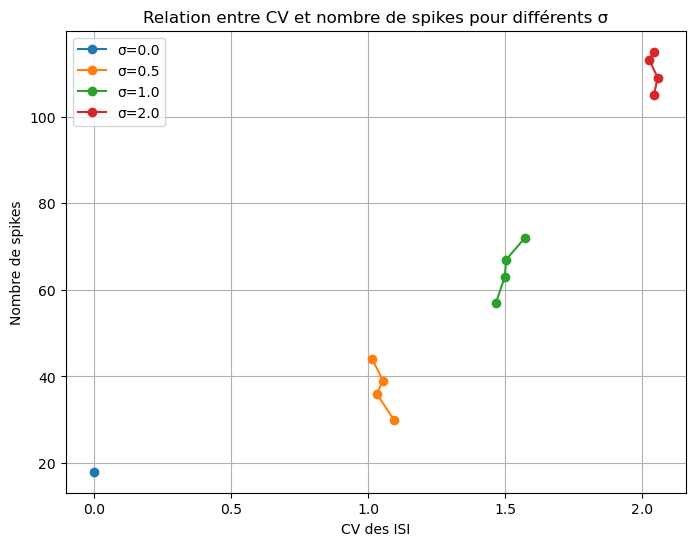

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du neurone LIF
pars = {
    'V_rest': -65,
    'V_th': -50,
    'V_reset': -65,
    'tau_m': 20,
    'R_m': 10,
    'dt': 0.1,
    'range_t': np.arange(0, 500, 0.1)
}

def my_GWN(pars, mu, sig, myseed=False):
    dt, range_t = pars['dt'], pars['range_t']
    Lt = range_t.size
    if myseed:
        np.random.seed(seed=myseed)
    I_gwn = mu + sig * np.random.randn(Lt) / np.sqrt(dt / 1000.)
    return I_gwn

def compute_spike_times(timeVector, stimVector, V_rest=-65, V_th=-50, V_reset=-65, tau_m=20, R_m=10):
    dt = timeVector[1] - timeVector[0]
    V = np.ones(len(timeVector)) * V_rest
    spike_times = []
    for t in range(1, len(timeVector)):
        dV = (-(V[t-1] - V_rest) + R_m * stimVector[t-1]) / tau_m * dt
        V[t] = V[t-1] + dV
        if V[t] >= V_th:
            V[t] = V_reset
            spike_times.append(timeVector[t])
    return spike_times

def isi_cv_LIF(spike_times):
    spike_times = np.array(spike_times)
    if len(spike_times) >= 2:
        isi = np.diff(spike_times)
        cv = np.std(isi) / np.mean(isi)
    else:
        isi = np.nan
        cv = np.nan
    return isi, cv

# Exploration : différents μ et σ
mu_values = [0.5, 1.0, 1.5, 2.0]   # courant moyen
sigma_values = [0.0, 0.5, 1.0, 2.0] # écart-type du bruit

results = []

for mu in mu_values:
    for sigma in sigma_values:
        I = my_GWN(pars, mu, sigma, myseed=2020)
        spike_times = compute_spike_times(pars['range_t'], I)
        isi, cv = isi_cv_LIF(spike_times)
        n_spikes = len(spike_times)
        results.append([mu, sigma, n_spikes, cv])

results = np.array(results)

# Tracé : nombre de spikes vs CV pour différents σ
plt.figure(figsize=(8,6))
for sigma in sigma_values:
    sel = results[:,1]==sigma
    plt.plot(results[sel,3], results[sel,2], 'o-', label=f"σ={sigma}")
plt.xlabel("CV des ISI")
plt.ylabel("Nombre de spikes")
plt.title("Relation entre CV et nombre de spikes pour différents σ")
plt.legend()
plt.grid(True)
plt.show()


Relation taux / CV :

Généralement, taux ↑ → CV ↓, car un neurone qui déclenche souvent tend à être plus régulier.

Pour un faible μ, le bruit domine et le CV est élevé.

Le graphique tracé montre cette relation inverse de manière claire pour différents σ.